## HW1

## Programming Questions

## a)Data Processing

1) Given a csv file named "data_train.csv". I need to read the data using the pandas library using read_csv function.
2) After reading the data, I need to print the first five rows. I used head() method which by default, returns the first five rows if parameter is not specified.
3) I checked for missing values and returned the null values. To do this I used isnull method. The isnull method provides dataframe objects that have all NULLs substituted with true and non-NULLs substituted with false. The sum method returns the sum of each column containing NULL.
4) After the above step, I removed the rows where there are missing values using dropna method. After this step, I extracted the features and label.

In [6]:
import pandas as pd # Import the pandas library
import numpy as np # Import the numpy library

data = pd.read_csv('data_train.csv')
print(data.head()); #by default head method returns the first five rows if a number is not mentioned

   Unnamed: 0  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0           0        797.0    -200.0       2.1          593.0    146.0   
1           1       1282.0    -200.0      11.0         1013.0    354.0   
2           2        891.0    -200.0       7.6          882.0    342.0   
3           3       1285.0    -200.0      18.1         1243.0    481.0   
4           4        892.0    -200.0       7.3          869.0     71.0   

   PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0        1212.0     72.0         984.0        494.0  10.8  49.7  0.6429  
1         545.0    141.0        1384.0       1287.0  17.4  50.6  0.9989  
2         885.0    149.0         950.0        894.0   7.8  33.9  0.3594  
3         599.0    173.0        1815.0       1582.0  26.4  41.9  1.4237  
4         953.0     77.0        1363.0        632.0  37.4  14.7  0.9295  


Description of given data: The given file consists of 13 columns with 12 named columns and 1 unnamed column. The unnamed column looks like providing index for the data starting from 0.

In [8]:
null_data = data.isnull().sum(); #isnull method returns the dataframe objects where all NULL is replaced with true and non NULL is replaced with false.
#The sum method returns the sum of each column containing NULL.
print(null_data)

Unnamed: 0        0
PT08.S1(CO)      77
NMHC(GT)         77
C6H6(GT)         77
PT08.S2(NMHC)    77
NOx(GT)          77
PT08.S3(NOx)     77
NO2(GT)          77
PT08.S4(NO2)     77
PT08.S5(O3)      77
T                77
RH               77
AH               77
dtype: int64


It is observed that for each named column there are 77 missing values 

In [10]:
data = data.dropna() #drop the rows where there are missing values
print(data)

      Unnamed: 0  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0              0        797.0    -200.0       2.1          593.0    146.0   
1              1       1282.0    -200.0      11.0         1013.0    354.0   
2              2        891.0    -200.0       7.6          882.0    342.0   
3              3       1285.0    -200.0      18.1         1243.0    481.0   
4              4        892.0    -200.0       7.3          869.0     71.0   
...          ...          ...       ...       ...            ...      ...   
6244        6244        918.0    -200.0       4.5          737.0    220.0   
6245        6245        824.0    -200.0       2.2          602.0     54.0   
6246        6246       1003.0    -200.0       3.7          694.0    156.0   
6247        6247        894.0    -200.0       4.0          709.0     46.0   
6248        6248       1213.0    -200.0      21.6         1341.0    210.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH 

It can be observed that previously there are 6250 rows × 13 columns and now there are 6173 rows × 13 columns

In [12]:
features = data.iloc[:,[2,3,4,5,6,7,8,9,10,11,12]] # Extract columns from index 2 to 12 as features
print(features) # Display the extracted features

      NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0       -200.0       2.1          593.0    146.0        1212.0     72.0   
1       -200.0      11.0         1013.0    354.0         545.0    141.0   
2       -200.0       7.6          882.0    342.0         885.0    149.0   
3       -200.0      18.1         1243.0    481.0         599.0    173.0   
4       -200.0       7.3          869.0     71.0         953.0     77.0   
...        ...       ...            ...      ...           ...      ...   
6244    -200.0       4.5          737.0    220.0        1007.0    105.0   
6245    -200.0       2.2          602.0     54.0        1138.0     44.0   
6246    -200.0       3.7          694.0    156.0         876.0    116.0   
6247    -200.0       4.0          709.0     46.0         997.0     53.0   
6248    -200.0      21.6         1341.0    210.0         683.0    143.0   

      PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0            984.0        494.0  10.8  49.7  

In [13]:
labels = data.iloc[:,[1]] # Extract the label column of index 1 from the dataset
print(labels) # Display the extracted labels

      PT08.S1(CO)
0           797.0
1          1282.0
2           891.0
3          1285.0
4           892.0
...           ...
6244        918.0
6245        824.0
6246       1003.0
6247        894.0
6248       1213.0

[6173 rows x 1 columns]


## (b) Exploratory Data Analysis

1) I have plotted the histograms of all the features in the data to observe whether the features have a normal distribution or not.

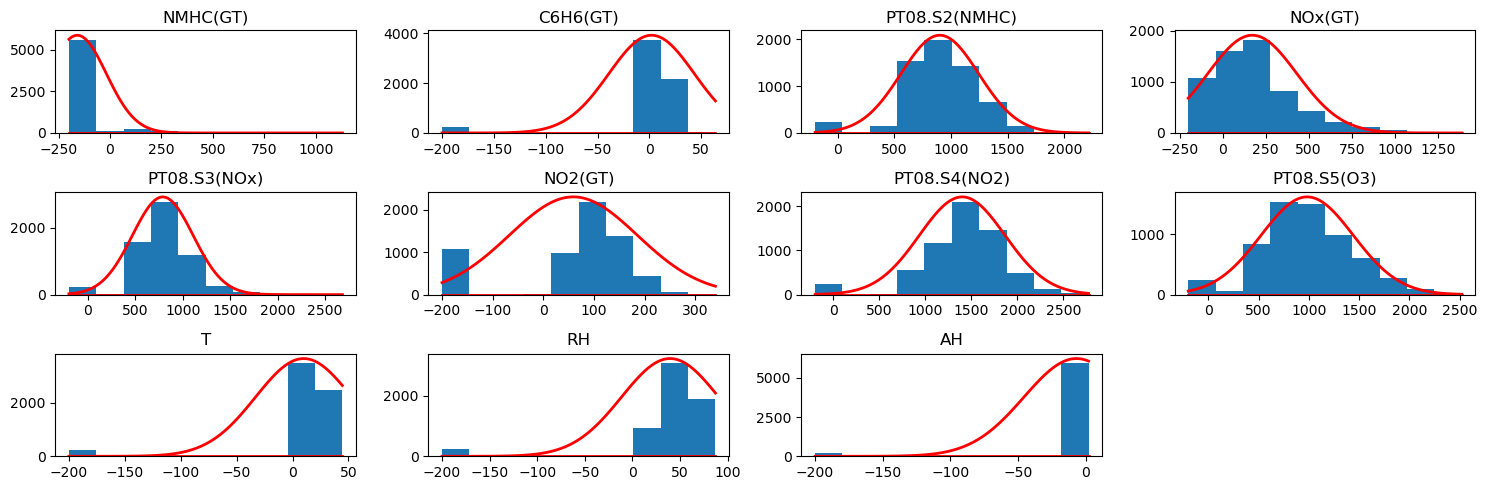

In [16]:
import matplotlib.pyplot as pyplot
from matplotlib.pyplot import subplots
from scipy.stats import norm
fig , axes = subplots(nrows=3, ncols=4, figsize=(15, 5)) # Create subplots with 3 rows and 4 columns, with a figure size of (15, 5)
index = 0  # Initialize index for iterating over features
title = features.columns
for i in range(0,3):
    for j in range(0,4):
        axes[i,j].hist(features.iloc[:,[index]])  # Plot histogram for the current feature
        axes[i, j].set_title(title[index]) # Set the title of the subplot using the column name of the feature
        # Calculate mean and standard deviation of the current feature
        mean = features.iloc[:,[index]].mean()
        std = features.iloc[:,[index]].std()
        # Get the min and max of the feature to define the x-axis range
        xmin = features.iloc[:,[index]].min()
        xmax = features.iloc[:,[index]].max() 
        x = np.linspace(xmin, xmax, 100) #This will generate 100 points between xmin and xmax.
        p = norm.pdf(x, mean, std) #This calculates the normal distribution curve at the x values using the specified mean and standard deviation.
        hist_max = axes[i,j].get_ylim()
        y_scaled = p * (hist_max / p.max()) #Scale the normal distribution curve to fit the histogram's y-axis range
        axes[i,j].plot(x, y_scaled, 'r', linewidth=2) # Plot the normal distribution curve on top of the histogram
        index = index + 1 # Increment index to move to the next feature
        if(index >=11):
            break
fig.delaxes(axes[2,3]); # I added this to remove the empty plot in the end
pyplot.tight_layout()
pyplot.show()

Yes there are outliers for some of the features. Outliers can significantly influence evaluations, especially in approaches like linear regression. Also features have different ranges. so when features have very different ranges, normalization ensures all features contribute equally to model training and prevents features with larger scales from dominating. So, I have done z-score normalisation. Z-score normalization (also called standardization) does not remove outliers but can reduce their impact on the dataset by scaling the values.

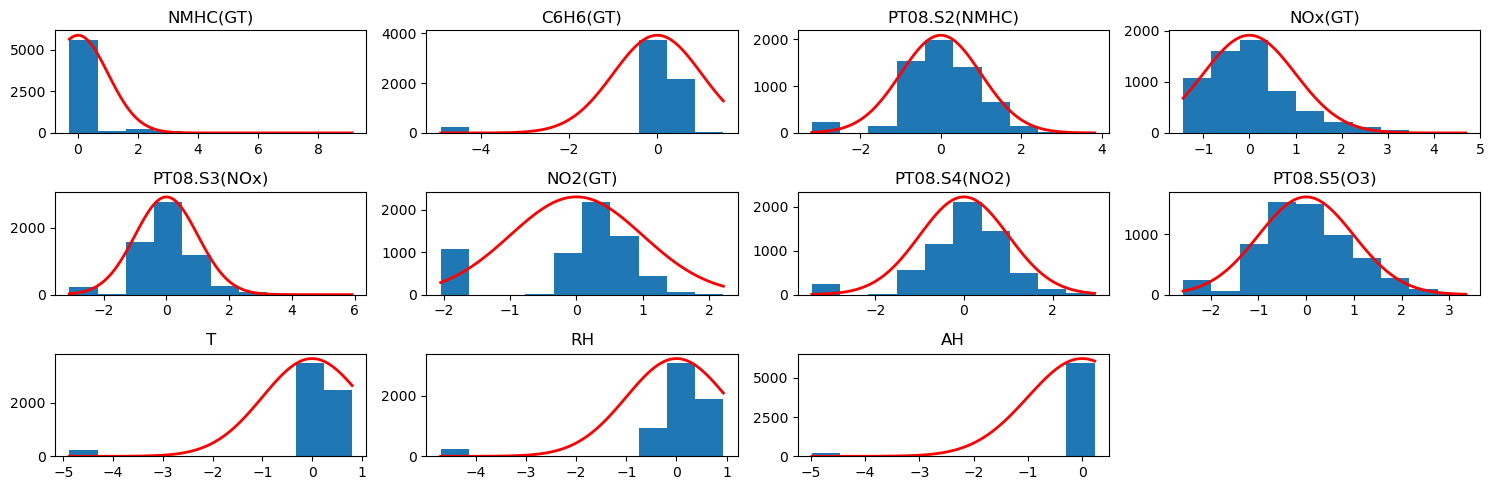

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Initialize the StandardScaler for Z-score normalization (standardization)
ZNorm_features = scaler.fit_transform(features)
index = 0
fig , axes = subplots(nrows=3, ncols=4, figsize=(15, 5)) # Create subplots with 3 rows and 4 columns, with a figure size of (15, 5)
for i in range(0,3):
    for j in range(0,4):
        axes[i,j].hist(ZNorm_features[:,index])  # Plot histogram for the current feature
        axes[i, j].set_title(title[index]) # Set the title of the subplot using the column name of the feature
        # Calculate mean and standard deviation of the current feature
        mean = ZNorm_features[:,index].mean()
        std = ZNorm_features[:,index].std()
        # Get the min and max of the feature to define the x-axis range
        xmin = ZNorm_features[:,index].min()
        xmax = ZNorm_features[:,index].max() 
        x = np.linspace(xmin, xmax, 100) #This will generate 100 points between xmin and xmax.
        p = norm.pdf(x, mean, std) #This calculates the normal distribution curve at the x values using the specified mean and standard deviation.
        hist_max = axes[i,j].get_ylim()
        y_scaled = p * (hist_max[1] / p.max()) #Scale the normal distribution curve to fit the histogram's y-axis range
        axes[i,j].plot(x, y_scaled, 'r', linewidth=2) # Plot the normal distribution curve on top of the histogram
        index = index + 1 # Increment index to move to the next feature
        if(index >=11):
            break
fig.delaxes(axes[2,3]); # I added this to remove the empty plot in the end
pyplot.tight_layout()
pyplot.show()

It can be observed from the plots that the range of features are scaled

Correlation Coefficient Matrix:
 [[1.        0.1835218]
 [0.1835218 1.       ]]


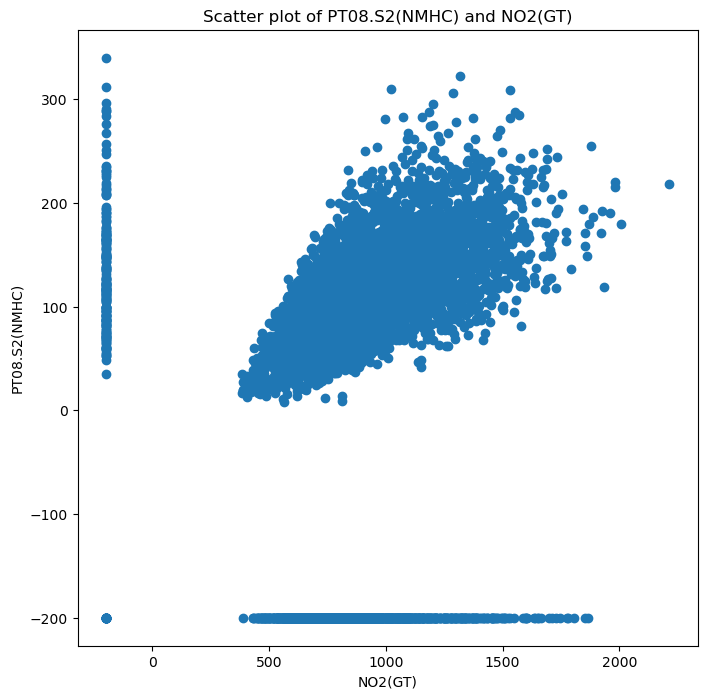

In [20]:
a = features.iloc[:,2] # NO2(GT)
b = features.iloc[:,5] # PT08.S2(NMHC)
fig , axes = subplots(figsize=(8, 8)) # Create a figure and axis for the scatter plot
axes.scatter(a, b, marker='o'); # Create the scatter plot
# Set the labels and title for the plot
axes.set_xlabel("NO2(GT)")
axes.set_ylabel("PT08.S2(NMHC)")
axes.set_title("Scatter plot of PT08.S2(NMHC) and NO2(GT)");
correlation = np.corrcoef(a, b)
print("Correlation Coefficient Matrix:\n", correlation)


A Correlation Coefficient of 0.1835218 shows that the taken features is nor considered as higly correlated. In linear regression setting, $R^2$ is square of Correlation coefficient. 
Therefore $R^2$ = 0.03368025107524. This means that only 3.36% of variance of [NO2(GT)] is dependent on another variable [ PT08.S2(NMHC) ]

In [22]:
variables = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]]
rows_N, columns_N = 12, 12
C = [[0 for i in range(columns_N)] for j in range(rows_N)] # Initialize an empty matrix C of size 12x12 to store correlation coefficients
for i in range(0,12):
    for j in range(0,12):
        x = variables.iloc[:,i]
        y = variables.iloc[:,j]
        result = np.corrcoef(x, y) # Compute the correlation coefficient between x and y
        C[i][j] = result[0][1]

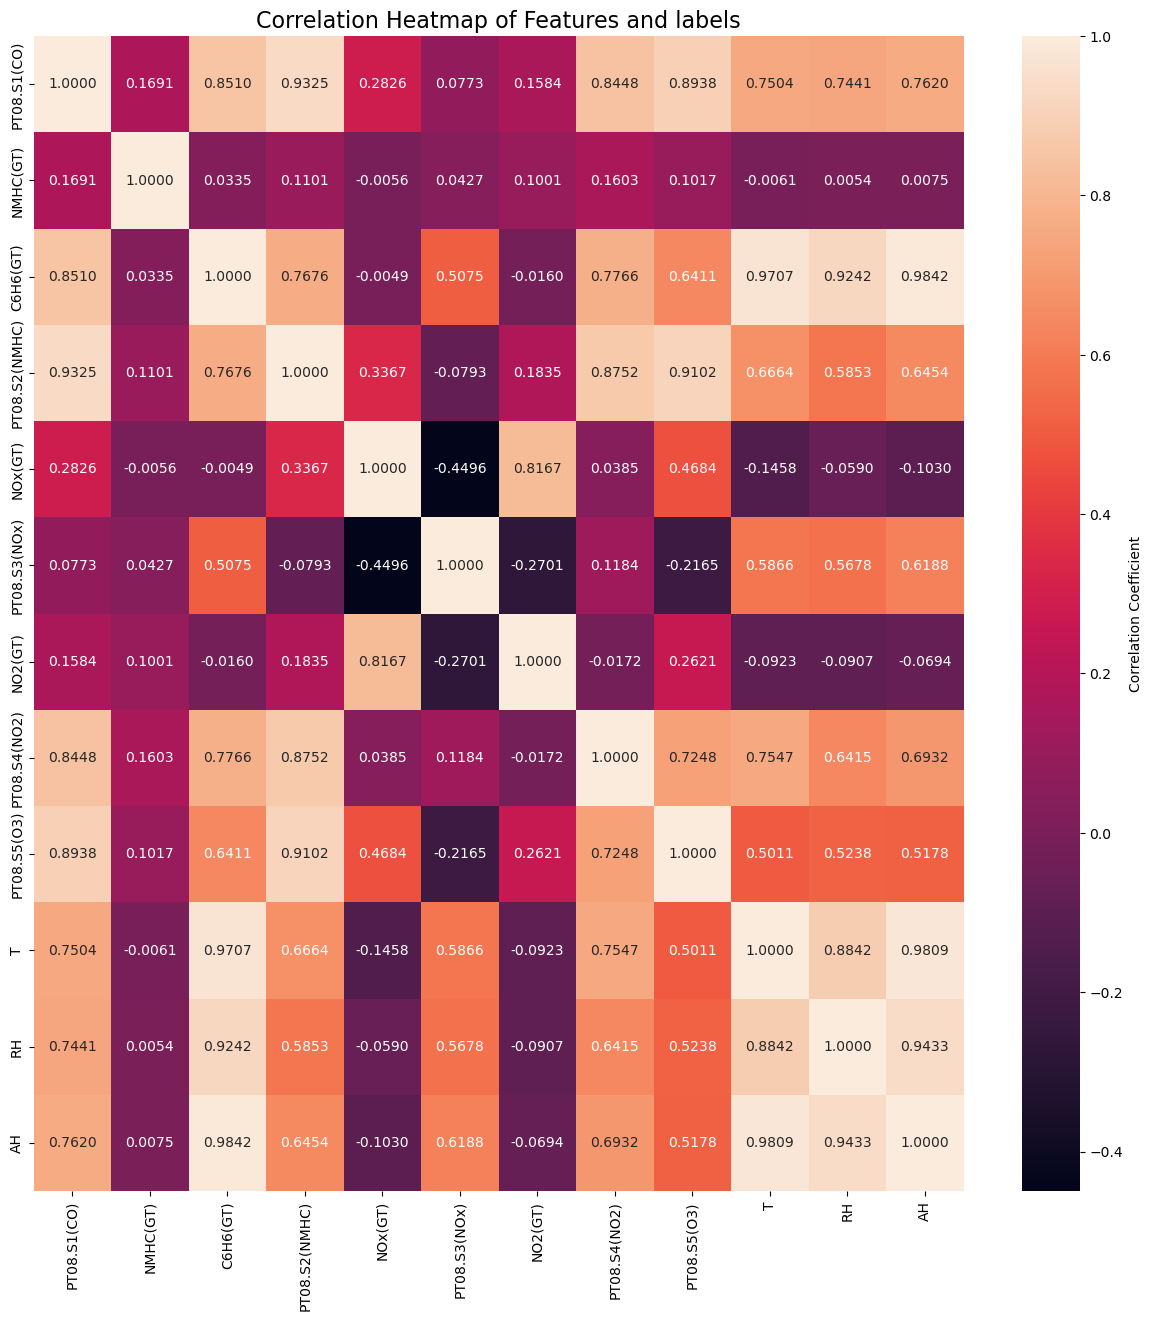

In [23]:
import seaborn as sns
fig , axes = subplots(figsize=(15, 15))
heatmap_ticklabels = variables.columns # Get column names for the heatmap tick labels

# Create the heatmap with annotations, 4 decimal places, and custom tick labels
p1 = sns.heatmap(C, annot=True, fmt=".4f", xticklabels=heatmap_ticklabels,
                 yticklabels=heatmap_ticklabels, 
                 cbar_kws={'label': 'Correlation Coefficient'})
# Set a title for the heatmap
pyplot.title("Correlation Heatmap of Features and labels", fontsize=16)

# Show the plot
pyplot.show()

From the perspective of target, the correlation coefficient with respect to NMHC(GT), NOx(GT), PT08.S3(N)x), NO2(GT) is very less. It looks like the target is less dependent on these values. But based on these correlation coefficient values itself, we can't cancel out these features.

# (c) Linear Regression Implementation)

For Linear Regression, I have considered below equations for the implementation.
$$y_{predicted} = X.\beta$$
$$Cost = \frac{1}{2m} \sum_{i=1}^{m} (y_{predicted} - y_{observed})^2 $$
$$Gradient = \frac{\partial cost}{\partial \beta} = \frac{1}{m}.X^T.(y_{predicted} - y_{observed})$$
$$ \beta = \beta - \alpha.Gradient$$

In [27]:
y_observed  = labels.iloc[:,[0]] # Extract the observed values
temp_arr  = np.ones((ZNorm_features.shape[0],1)) # Create an array of ones
Inputs = np.column_stack((temp_arr , ZNorm_features)) # Appended the column of ones on start.
print(y_observed.shape)

(6173, 1)


In [28]:
def gradient_func(X_transpose, Y_observed, Y_expected, M):
        error = Y_expected - Y_observed # Calculate the error between predicted and observed values
        grad = (1/M) * np.dot(X_transpose,error) # Compute the gradient
        return grad

In [29]:
class LinearRegModel:
    def __init__(self,num_parameters):
        self.parameters = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0]) # Initialize parameters (weights) to zeros, including for the bias term
        self.parameters = self.parameters.reshape((num_parameters+1, 1))
        self.rmse_iter = []
        
    def Train(self,MaxIter, learning_rate, Inputs, y_observed):
        iteration_Index = 0
        # Perform gradient descent for the specified number of iterations
        while(iteration_Index < MaxIter):
            # Compute the predicted values (y_expected)
            y_expected = np.dot(Inputs, self.parameters)
            # Compute the gradient
            Gradient = gradient_func(Inputs.T, y_observed, y_expected, Inputs.shape[0])
            # Update the parameters using the gradient
            self.parameters = self.parameters - learning_rate*Gradient
            self.rmse_iter.append(self.rmse(y_expected,y_observed))
            iteration_Index = iteration_Index + 1
        
    def predict(self, Inputs):
        #compute the predictions by multiplication of Inputs and Weights
        predictions = np.dot(Inputs, self.parameters)
        return predictions
        
    def rmse(self, predictions, Y_observed):
        #Compute the Root Mean Squared Error (RMSE)
        return np.sqrt(np.mean((Y_observed - predictions) * (Y_observed - predictions)))
        


# (d) Logistic Regression Implementation

I used the same gradient function which was used for linear regression. Same process has been followed and for final prediction,

* First I found Y from the linear regression method
* Then I passed the Y to sigmoid function which gives probabilites between 0 to 1
* After computing probabilities, I labled the output as 1 if probability is greater than or equal to 0.5 and labeled as 0 if probability is less than 0.5

In [32]:
y_observed_logistic = labels.iloc[:,[0]]

# Convert values greater than 1000 to 1, and others to 0
for i in range(y_observed_logistic.shape[0]):
    if(y_observed_logistic.iloc[i, 0] > 1000):
        y_observed_logistic.iloc[i, 0] = 1
    else:
        y_observed_logistic.iloc[i, 0] = 0
        
# Define the sigmoid function
def sigmoid_func(Input):
    Output = 1/(1 + np.exp(-Input))
    return Output
class LogisticRegModel:
    def __init__(self,num_parameters):
        self.parameters = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0])
        self.parameters = self.parameters.reshape((num_parameters+1, 1))
        self.rmse_iter = []
        # Initialize evaluation metrics
        self.accuracy = 0
        self.precision = 0
        self.recall = 0
        self.F1 = 0
        self.predictions_prob = []
        
    def Train(self,MaxIter, learning_rate, Inputs, y_observed):
        iteration_Index = 0
        while(iteration_Index < MaxIter):
            y_expected = np.dot(Inputs, self.parameters)
            y_expected_prob = sigmoid_func(y_expected)
            Gradient = gradient_func(Inputs.T, y_observed, y_expected_prob, Inputs.shape[0])
            self.parameters = self.parameters - learning_rate*Gradient
            self.rmse_iter.append(self.rmse(y_expected_prob,y_observed))
            iteration_Index = iteration_Index + 1
        
    def predict(self, Inputs):
        predictions = np.dot(Inputs, self.parameters)
         # Compute predicted probabilities using the sigmoid function
        self.predictions_prob = sigmoid_func(predictions)
        # Convert predicted probabilities to 0 or 1
        for i in range(self.predictions_prob.shape[0]):
            if(self.predictions_prob[i] >= 0.5):
                predictions[i] = 1
            else:
                predictions[i] = 0
        return predictions
        
    def MetricCalc(self, y_observed, y_predicted):
        TP = 0
        TN = 0
        FP = 0
        FN = 0
        for i in range(y_observed.shape[0]):
            if((y_observed.iloc[i, 0] == 1) and (y_predicted[i] == 1)):
                TP = TP + 1
            if((y_observed.iloc[i, 0] == 0) and (y_predicted[i] == 1)):
                FP = FP + 1
            if((y_observed.iloc[i, 0] == 0) and (y_predicted[i] == 0)):
                TN = TN + 1
            if((y_observed.iloc[i, 0] == 1) and (y_predicted[i] == 0)):
                FN = FN + 1
         # Calculate accuracy, precision, recall, and F1 score
        self.accuracy = (TP + TN)/(TP + FP + TN + FN)
        self.precision = TP/(TP + FP)
        self.recall = TP/(TP + FN)
        self.F1 = 2*self.precision*self.recall/(self.precision + self.recall)
        Metrics = [self.accuracy, self.precision, self.recall, self.F1]
        return Metrics
        
    def rmse(self, predictions, Y_observed):
        #Compute the Root Mean Squared Error (RMSE)
        return np.sqrt(np.mean((Y_observed - predictions) * (Y_observed - predictions)))
        

# (e)  Result Analysis - Linear Regression

I have done five fold cross-validation implementation where I have divided the data in 5 parts. Each time a part will test data and remaining parts are for training the Model. After testing the data in each loop, I have computed RMSE for each loop. After the five fold cross-validation, I have computed the average and standard deviation of RMSE to observed its behavior. Also, I have computed the average of the parameters. This average will be used during the inference of the test data.

Average of RMSE
72.05352591327801
Standard Deviation of RMSE
1.891706877189094
RMSE  Values
[70.90400860511943, 72.86610816614291, 68.93187304548782, 73.4783016087326, 74.08733814090735]


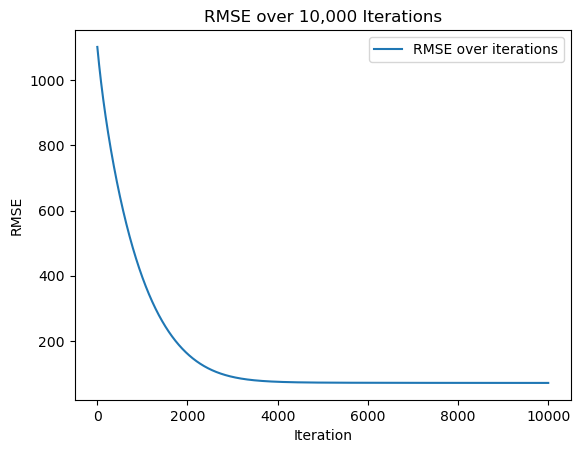

In [35]:
# Initialize a list to store RMSE values for each fold
RMSE = []

Train_parameters = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0])
Train_parameters = Train_parameters.reshape((12, 1))

# 5-fold cross-validation loop
for i in range(0,5):
    # Initialize a new Linear Regression model for each fold
    LinRegModel_h = LinearRegModel(11)
    # Prepare the training and test sets for the current fold
    if(((i - 1) > 0) and ((i+1) <5)): # Middle folds
        Train_In = np.concatenate((Inputs[((Inputs.shape[0] //5)*(i-1)):((Inputs.shape[0] //5)*(i))], 
                                   Inputs[((Inputs.shape[0] //5)*(i+1)):]), axis = 0)
        Train_out = np.concatenate((y_observed[((Inputs.shape[0] //5)*(i-1)):((Inputs.shape[0] //5)*(i))],
                                    y_observed[((Inputs.shape[0] //5)*(i+1)):]), axis = 0)
    else:
        if((i-1) < 0): # First fold
            Train_In = Inputs[(Inputs.shape[0] //5):]
            Train_out = y_observed[(Inputs.shape[0] //5):]
        if((i+1) >=5): # Last fold
            Train_In = Inputs[0:((Inputs.shape[0] //5)*4)]
            Train_out = y_observed[0:((Inputs.shape[0] //5)*4)]
   
    # Set learning rate and maximum number of iterations
    Train_LR = 0.001
    Train_MaxIter = 10000

    # Train the Linear Regression model on the training set
    LinRegModel_h.Train(Train_MaxIter, Train_LR,Train_In ,Train_out)
    
    # Prepare the test set for the current fold
    Inputs_test =  Inputs[((Inputs.shape[0] //5)*i):((Inputs.shape[0] //5)*(i+1))]
    y_observed_test = y_observed[((Inputs.shape[0] //5)*i):((Inputs.shape[0] //5)*(i+1))]

    Train_parameters = Train_parameters + LinRegModel_h.parameters # add the computed paramters so that we can average after all folds
    Predictions_test = LinRegModel_h.predict(Inputs_test) #Get the predictions from the test input
    RMSE.append(LinRegModel_h.rmse(Predictions_test, y_observed_test)) #Compute RMSE and append the value to the list.
    
Train_parameters = (1/5)*Train_parameters
print("Average of RMSE")
print(np.mean(RMSE))
print("Standard Deviation of RMSE")
print(np.std(RMSE))
print("RMSE  Values")
print(RMSE)

#plotting RMSE ove the iterations for the last iteration data.
# Generate the x-axis values (1 to 10,000)
iterations = range(1, len(LinRegModel_h.rmse_iter) + 1)
pyplot.figure()
pyplot.plot(iterations, LinRegModel_h.rmse_iter, label='RMSE over iterations')
# Add labels and title
pyplot.xlabel('Iteration')
pyplot.ylabel('RMSE')
pyplot.title('RMSE over 10,000 Iterations')
pyplot.legend()

# Show the plot
pyplot.show()

* It is observed that RMSE for each fold iteration has values in range of 68.93 to 74.08 with standard deviation of 1.8917. I have plotted rmse for each iteration for last fold, to observe the characteristics of RMSE over the iteration. It can be obsererved that nearly from 4000 iteration, the RMSE value remained same. So, for this learning rate, we can give 4000 iterations to achieve the similar results for 10000 iterations. This can help in reducing the time for training the data

# (f) Result Analysis - Logistic Regression

I have done five fold cross-validation implementation where I have divided the data in 5 parts. Each time a part will test data and remaining parts are for training the Model. After testing the data in each loop, I have computed accuracy, precision, recall, f1 for each loop. After the five fold cross-validation, I have computed the average and standard deviation of Metrics to observed its behavior. Also, I have computed the average of the parameters. This average will be used during the inference of the test data. Also for each loop I have calculated ROC and plotted the ROC curve.

Fold 1 - Accuracy: 0.9157212317666127, Precision: 0.9209809264305178, Recall: 0.9362880886426593, F1: 0.9285714285714286
AUC Score: 0.9719150363573407


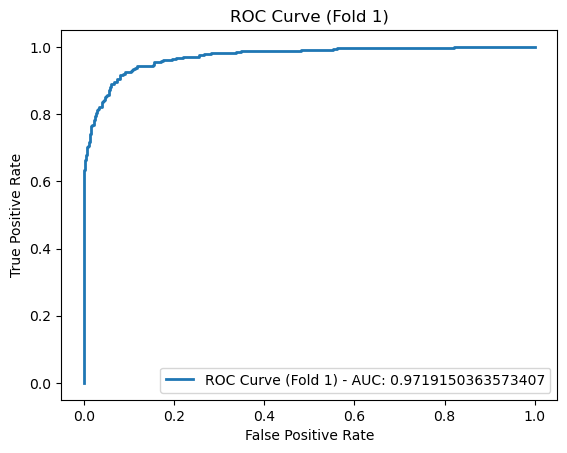

Fold 2 - Accuracy: 0.913290113452188, Precision: 0.929427430093209, Recall: 0.9281914893617021, F1: 0.9288090485695276
AUC Score: 0.9728524763838616


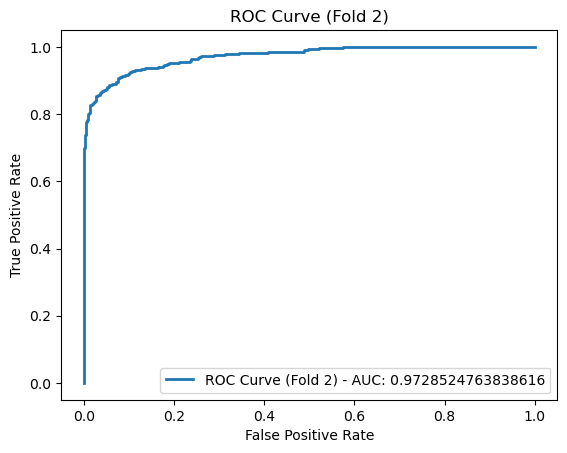

Fold 3 - Accuracy: 0.9043760129659644, Precision: 0.9157754010695187, Recall: 0.9256756756756757, F1: 0.9206989247311828
AUC Score: 0.973290294342926


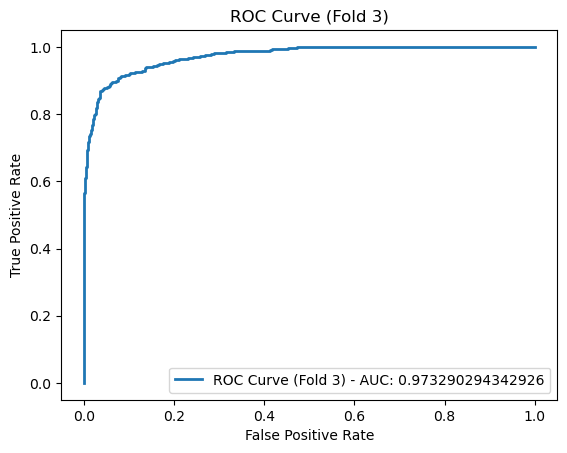

Fold 4 - Accuracy: 0.8978930307941653, Precision: 0.9174434087882823, Recall: 0.9150066401062417, F1: 0.916223404255319
AUC Score: 0.9666779865983054


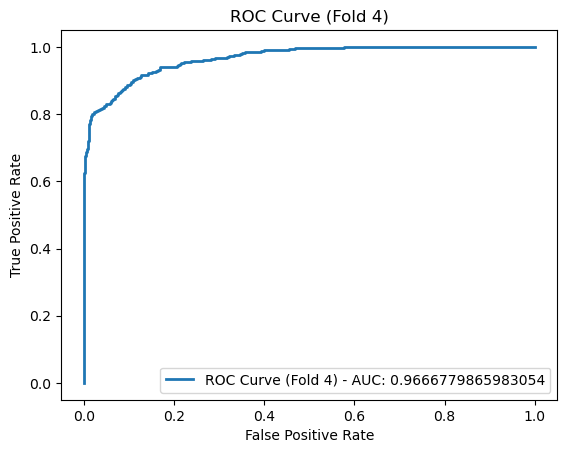

Fold 5 - Accuracy: 0.9043760129659644, Precision: 0.9146183699870634, Recall: 0.9314888010540184, F1: 0.922976501305483
AUC Score: 0.9708120102628112


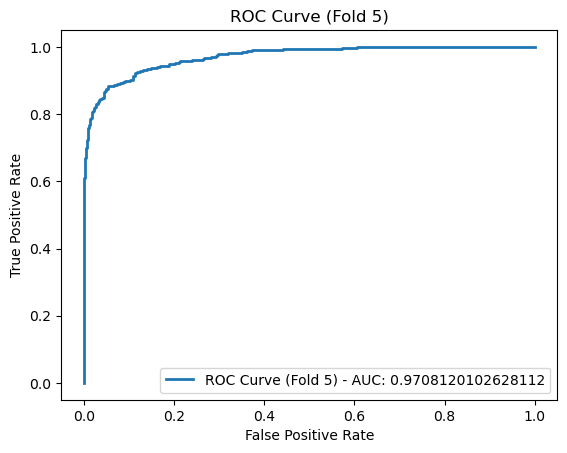

Mean Accuracy: 0.9071312803889789  Mean precision: 0.9196491072737183  Mean recall: 0.9273301389680595  Mean F1: 0.9234558614865882
std Accuracy: 0.006515316448052464  std precision: 0.005339819522063282  std recall: 0.007111780792481655  std F1: 0.004795092545574584


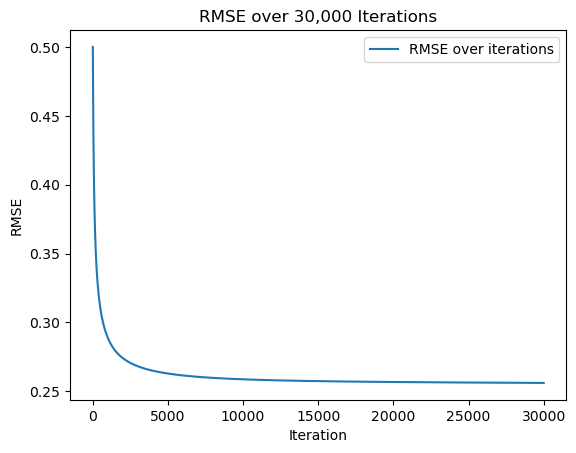

In [39]:
from sklearn.metrics import roc_curve, auc

# Initialize training parameters for logistic regression with zeros
Train_parameters_Log = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0])
Train_parameters_Log = Train_parameters_Log.reshape((12, 1))

# Initialize lists to store evaluation metrics
Accuracy = []
Precision = []
recall = []
F1 = []

# 5-fold cross-validation loop
for i in range(0,5):
    LogRegModel_h = LogisticRegModel(11) # Initialize a new Logistic Regression model for each fold

    # Prepare the training and test sets for the current fold
    if(((i - 1) > 0) and ((i+1) <5)):
        Train_In_Log = np.concatenate((Inputs[((Inputs.shape[0] //5)*(i-1)):((Inputs.shape[0] //5)*(i))], 
                                       Inputs[((Inputs.shape[0] //5)*(i+1)):]), axis = 0)
        Train_out_Log = np.concatenate((y_observed_logistic[((Inputs.shape[0] //5)*(i-1)):((Inputs.shape[0] //5)*(i))], 
                                        y_observed_logistic[((Inputs.shape[0] //5)*(i+1)):]), axis = 0)
    else:
        if((i-1) < 0):
            Train_In_Log = Inputs[(Inputs.shape[0] //5):]
            Train_out_Log = y_observed_logistic[(Inputs.shape[0] //5):]
        if((i+1) >=5):
            Train_In_Log = Inputs[0:((Inputs.shape[0] //5)*4)]
            Train_out_Log = y_observed_logistic[0:((Inputs.shape[0] //5)*4)]

    # Set learning rate and maximum number of iterations
    Train_LR_Log = 0.01
    Train_MaxIter_Log = 30000

    # Train the Logistic Regression model on the training set
    LogRegModel_h.Train(Train_MaxIter_Log, Train_LR_Log,Train_In_Log ,Train_out_Log)

    # Prepare the test set for the current fold
    Inputs_test_Log =  Inputs[((Inputs.shape[0] //5)*i):((Inputs.shape[0] //5)*(i+1))]
    y_observed_test_Log = y_observed_logistic[((Inputs.shape[0] //5)*i):((Inputs.shape[0] //5)*(i+1))]

    # Update the cumulative train parameters
    Train_parameters_Log = Train_parameters_Log + LogRegModel_h.parameters

    # Make predictions on the test set
    Predictions_test_Log = LogRegModel_h.predict(Inputs_test_Log)

    # Calculate evaluation metrics (accuracy, precision, recall, F1 score)
    Metrics_test = LogRegModel_h.MetricCalc(y_observed_test_Log, Predictions_test_Log)

    # Print metrics for this fold
    print(f"Fold {i+1} - Accuracy: {Metrics_test[0]}, Precision: {Metrics_test[1]}, Recall: {Metrics_test[2]}, F1: {Metrics_test[3]}")

    # Store the evaluation metrics for this fold
    Accuracy.append(Metrics_test[0])
    Precision.append(Metrics_test[1])
    recall.append(Metrics_test[2])
    F1.append(Metrics_test[3])

    # Compute ROC curve and AUC for this fold
    fpr, tpr, _ = roc_curve(y_observed_test_Log, LogRegModel_h.predictions_prob)
    roc_auc = auc(fpr, tpr)
    print(f"AUC Score: {roc_auc}")

    # Plot the ROC curve
    pyplot.figure()
    pyplot.plot(fpr, tpr, lw=2, label=f'ROC Curve (Fold {i+1}) - AUC: {roc_auc}')
    pyplot.title(f'ROC Curve (Fold {i+1})')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend(loc='lower right')
    pyplot.show()
    
# Average the parameters across all folds
Train_parameters_Log= (1/5)*Train_parameters_Log
print("Mean Accuracy:",np.mean(Accuracy), " Mean precision:" ,np.mean(Precision), " Mean recall:",np.mean(recall), " Mean F1:",np.mean(F1))
print("std Accuracy:",np.std(Accuracy), " std precision:" ,np.std(Precision), " std recall:",np.std(recall), " std F1:",np.std(F1))

#plotting RMSE ove the iterations for the last iteration data.
# Generate the x-axis values (1 to 30,000)
iterations = range(1, len(LogRegModel_h.rmse_iter) + 1)
pyplot.figure()
pyplot.plot(iterations, LogRegModel_h.rmse_iter, label='RMSE over iterations')
# Add labels and title
pyplot.xlabel('Iteration')
pyplot.ylabel('RMSE')
pyplot.title('RMSE over 30,000 Iterations')
pyplot.legend()

# Show the plot
pyplot.show()

* I have plotted rmse for each iteration for last fold, to observe the characteristics of RMSE over the iteration. It can be obsererved that nearly from 15000 iteration, the RMSE value remained same. So, for this learning rate, we can give 15000 iterations to achieve the similar results for 30000 iterations. This can help in reducing the time for training the data. I have trained the mdoel with learning rate 0.001 but couldn't achieve the similar results even at 30,000.
* The implemented model achieved the average accuracy of 91%, average precision of 92%, average recall 92.7% and average F1 92%. The standard deviations for all the metrics is nearly zero.

# (g) ROC Curve - Logistic Regression

Here I have taken logistic regression model from sklearn library and trained and tested with the same data which is used for the model I implemented from scratch. I have computed roc, accuracy, precision, recall, f1 and analysed the results to compare the performance of the my implementation with the model from the library.

Fold 1 - Accuracy: 0.9124797406807131, Precision: 0.9159891598915989, Recall: 0.9362880886426593, F1: 0.9260273972602739
Fold 1 - AUC Score: 0.9713848251385041


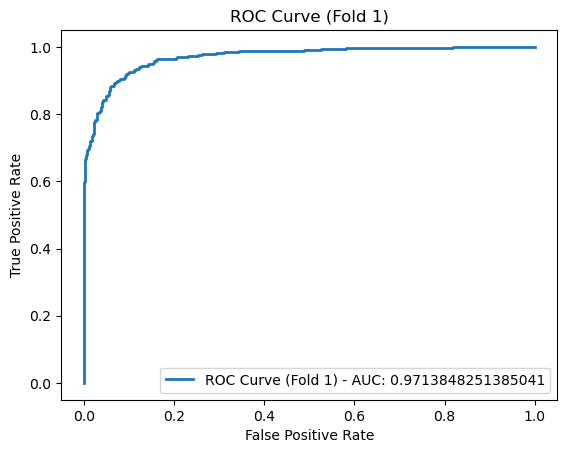

Fold 2 - Accuracy: 0.9100486223662885, Precision: 0.9267643142476698, Recall: 0.925531914893617, F1: 0.9261477045908184
Fold 2 - AUC Score: 0.9729931800123599


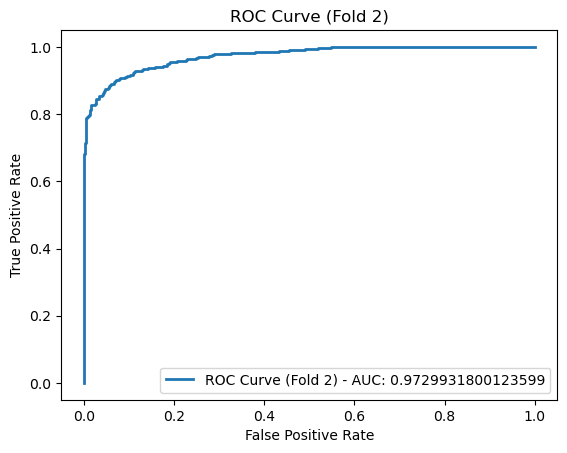

Fold 3 - Accuracy: 0.9076175040518638, Precision: 0.9173333333333333, Recall: 0.9297297297297298, F1: 0.9234899328859061
Fold 3 - AUC Score: 0.9737744829850092


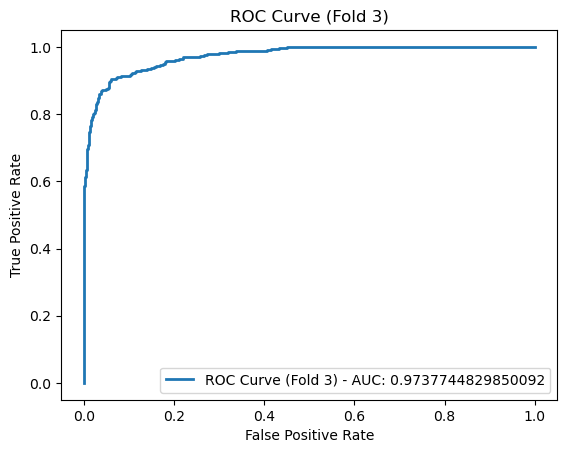

Fold 4 - Accuracy: 0.8962722852512156, Precision: 0.9139072847682119, Recall: 0.9163346613545816, F1: 0.9151193633952255
Fold 4 - AUC Score: 0.9680943585326055


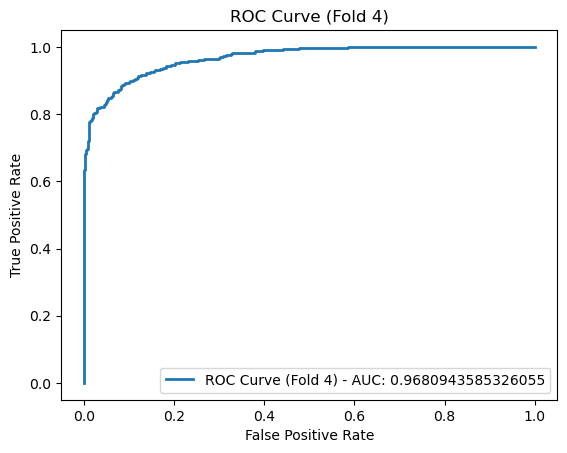

Fold 5 - Accuracy: 0.9059967585089141, Precision: 0.9148387096774193, Recall: 0.9341238471673254, F1: 0.924380704041721
Fold 5 - AUC Score: 0.9708120102628112


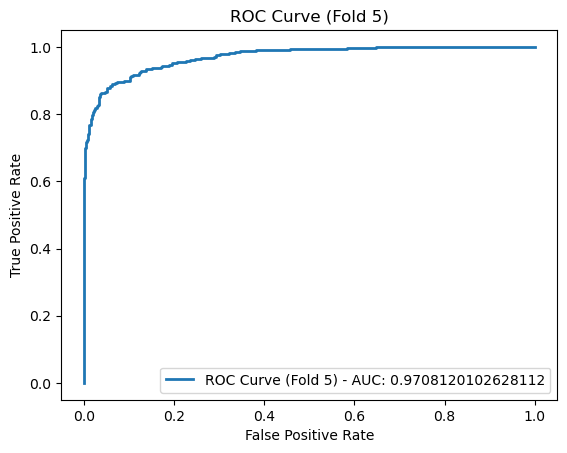

Mean Accuracy: 0.9064829821717991  Mean precision: 0.9177665603836467  Mean recall: 0.9284016483575825  Mean F1: 0.923033020434789
std Accuracy: 0.005557999416363755  std precision: 0.004642687385935938  std recall: 0.007078853653016796  std F1: 0.004082120473406787


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

# Initialize lists to store evaluation metrics
Accuracy = []
Precision = []
Recall = []
F1 = []

# 5-fold cross-validation loop
for i in range(0,5):
    logreg = LogisticRegression(random_state=16)

    # Prepare the training and test sets for the current fold
    if(((i - 1) > 0) and ((i+1) <5)):
        Train_In_Log = np.concatenate((Inputs[((Inputs.shape[0] //5)*(i-1)):((Inputs.shape[0] //5)*(i))], 
                                       Inputs[((Inputs.shape[0] //5)*(i+1)):]), axis = 0)
        Train_out_Log = np.concatenate((y_observed_logistic[((Inputs.shape[0] //5)*(i-1)):((Inputs.shape[0] //5)*(i))], 
                                        y_observed_logistic[((Inputs.shape[0] //5)*(i+1)):]), axis = 0)
    else:
        if((i-1) < 0):
            Train_In_Log = Inputs[(Inputs.shape[0] //5):]
            Train_out_Log = np.array(y_observed_logistic[(Inputs.shape[0] //5):])
        if((i+1) >=5):
            Train_In_Log = Inputs[0:((Inputs.shape[0] //5)*4)]
            Train_out_Log = np.array(y_observed_logistic[0:((Inputs.shape[0] //5)*4)])
            
    # Flatten the output labels (to 1D)
    Train_out_Log = Train_out_Log.ravel()
    
    # Train the logistic regression model on the training set
    logreg.fit(Train_In_Log, Train_out_Log)
    
    # Prepare the test set for the current fold
    Inputs_test_Log =  Inputs[((Inputs.shape[0] //5)*i):((Inputs.shape[0] //5)*(i+1))]
    y_observed_test_Log = np.array(y_observed_logistic[((Inputs.shape[0] //5)*i):((Inputs.shape[0] //5)*(i+1))])
    y_observed_test_Log = y_observed_test_Log.ravel()

    # Make predictions on the test set
    y_pred = logreg.predict(Inputs_test_Log)
    y_pred_proba = logreg.predict_proba(Inputs_test_Log)[:, 1]

    # Calculate evaluation metrics (accuracy, precision, recall, F1 score)
    accuracy_fold = accuracy_score(y_observed_test_Log, y_pred)
    precision_fold = precision_score(y_observed_test_Log, y_pred)
    recall_fold = recall_score(y_observed_test_Log, y_pred)
    f1_fold = f1_score(y_observed_test_Log, y_pred)

    # Store the evaluation metrics for this fold
    Accuracy.append(accuracy_fold)
    Precision.append(precision_fold)
    Recall.append(recall_fold)
    F1.append(f1_fold)

    # Print metrics for this fold
    print(f"Fold {i+1} - Accuracy: {accuracy_fold}, Precision: {precision_fold}, Recall: {recall_fold}, F1: {f1_fold}")
    
    # Compute ROC
    fpr, tpr, _ = roc_curve(y_observed_test_Log, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    print(f"Fold {i+1} - AUC Score: {roc_auc}")
    
    # Plot ROC curve for this fold
    pyplot.figure()
    pyplot.plot(fpr, tpr, lw=2, label=f'ROC Curve (Fold {i+1}) - AUC: {roc_auc}')
    pyplot.title(f'ROC Curve (Fold {i+1})')
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend(loc='lower right')
    pyplot.show()

print("Mean Accuracy:",np.mean(Accuracy), " Mean precision:" ,np.mean(Precision), " Mean recall:",np.mean(Recall), " Mean F1:",np.mean(F1))
print("std Accuracy:",np.std(Accuracy), " std precision:" ,np.std(Precision), " std recall:",np.std(Recall), " std F1:",np.std(F1))

The area under the ROC curve describes the perfomance of a classifier. It ranges from 0 to 1. If the value is 0.5, it is absolutely useless. with value equal to 1, it specifies that classifier is perfect. While using the logistic regression model from sklearn library, it is observed that AUC is nearly 0.97 for every fold. Even with my implementation, I got the same results which can be seen in previous plots. 

# (h) Inference - Linear and Logistic Regression

I have computed the results of test data with the trained parameters. The results are written back to the test data csv file in the last columns.

In [47]:
# Load the test data from the CSV file
TestData = pd.read_csv('data_test.csv')

# Drop rows with missing values
TestData = TestData.dropna()

# Extract the relevant features
Testfeatures = TestData.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]]

# Standardize the test features using Z-score normalization
testscaler = StandardScaler() #Standardization (also known as Z-score normalization)
ZNorm_testfeatures = testscaler.fit_transform(Testfeatures)

# Add a column of ones for the intercept
tempArr = np.ones((ZNorm_testfeatures.shape[0],1))
TestInputs = np.column_stack((tempArr, ZNorm_testfeatures))

# Initialize the Linear Regression model with 11 features
TestLinRegModel_h = LinearRegModel(11)

# Use the trained parameters from the linear regression training process
TestLinRegModel_h.parameters = Train_parameters

# Predict the target values for the test set
TestDataPredictions = TestLinRegModel_h.predict(TestInputs)

# Add the predictions to the TestData DataFrame as a new column 'pred_linear'
TestData['pred_linear'] = TestDataPredictions

print(TestData.head())

   Unnamed: 0  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0           0      -200       8.0            898      122           933   
1           1      -200      19.4           1281     -200           774   
2           2      -200       9.9            975      349           638   
3           3      -200      12.7           1075      103           749   
4           4      -200       2.9            647      131          1054   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  pred_linear  
0      105          1594         1098  17.0  51.7  0.9914  1102.390183  
1     -200          1952         1324  20.8  43.6  1.0614  1271.446439  
2      223          1243         1064   5.6  74.6  0.6826  1156.184602  
3       98          1690         1022  31.7  21.5  0.9902  1128.299625  
4       85           962          828   8.4  54.5  0.6022   932.911048  


In [48]:
# Initialize the Logistic Regression model with 11 features
TestLogRegModel_h = LogisticRegModel(11)

# Use the trained parameters from the logistic regression training process
TestLogRegModel_h.parameters =Train_parameters_Log

# Predict the target values for the test set
TestDataPredictions_Log = TestLogRegModel_h.predict(TestInputs)

# Add the predictions to the TestData DataFrame as a new column 'pred_logistic'
TestData['pred_logistic'] = TestDataPredictions_Log
TestData.to_csv('data_test.csv', index=False)

print(TestData.head())

   Unnamed: 0  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0           0      -200       8.0            898      122           933   
1           1      -200      19.4           1281     -200           774   
2           2      -200       9.9            975      349           638   
3           3      -200      12.7           1075      103           749   
4           4      -200       2.9            647      131          1054   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  pred_linear  \
0      105          1594         1098  17.0  51.7  0.9914  1102.390183   
1     -200          1952         1324  20.8  43.6  1.0614  1271.446439   
2      223          1243         1064   5.6  74.6  0.6826  1156.184602   
3       98          1690         1022  31.7  21.5  0.9902  1128.299625   
4       85           962          828   8.4  54.5  0.6022   932.911048   

   pred_logistic  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4        